(getting_started)=
# Getting started

## Installation

Install the [pyuncertainnumber](https://github.com/leslieDLcy/PyUncertainNumber) library from [PyPI](https://pypi.org/project/pyuncertainnumber/).

```shell
pip install pyuncertainnumber
```

```{important}
A virtual enviroment is recommended for installation.

Follow the [instructions](https://pyuncertainnumber.readthedocs.io/en/latest/guides/installation.html) for additional details on installing `pyuncertainnumber`.
```

`pyuncertainnumber` is underpinned by a framework of uncertain number which allows for a closed computation ecosystem whereby trustworthy computations can be conducted in a rigorous manner. It provides capabilities across the typical uncertainty analysis pipeline, encompassing characterisation, aggregation, propagation, and applications including reliability analysis and optimisation under uncertainty, especially with a focus on imprecise probabilities.

`pyuncertainnumber` exposes APIs at different levels, including **high-level user-friendly APIs** best suited for new users to quickly start with uncertainty computations, and **low-level APIs** which allow experts to have more controls over the algorithm. Each scheme has its advantages and the best uses will certainly depend on the user cases.

## High-level `Uncertain Number` APIs

As the name `pyuncertainnumber` suggests, the concept of *uncertain number* is the core to the uncertainty computation. The high-level APIs aim to give users a simple and straightforward syntax to quickly get on without worrying too much underlying nuances. Indeed, *uncertain number* is the umbrella term encompassing a wide range of uncertainty models and high-level APIs aims to allow users to perform calculations directly and consistently on uncertain numbers objects no matter what exactly the underlying uncertainty model (i.e. construct) they may be. Whatever the construct, it is an uncertain number.


```{important}
See the tutorial notebook [what is an uncertain number](./what_is_un.ipynb) for a better understanding of what "uncertain numbers" are.
```

Typically, this scheme will start with the import statement `import pyuncertainnumber as pun`. As illustrated below, with the high-level APIs, analysts can accomplish the *uncertainty charactertion-aggregation-propagation* workflow in only several lines of codes.

```{tip}
Some more examples of the high-level API can be found in [examples](https://pyuncertainnumber.readthedocs.io/en/latest/examples/index.html).
```

In [ ]:
%load_ext rich
import pyuncertainnumber as pun
import matplotlib.pyplot as plt

In [23]:
# construct uncertain numbers
x0 = pun.normal([2,3], [1])

expert_a = pun.I(1,5)
expert_b = pun.I(3,6)
expert_c = pun.I(2,3)
expert_d = pun.I(2,9)

# specify a response function
def foo(x): return x[0] ** 3 + x[1] + 2

In [24]:
# aggregation

x1 = pun.stochastic_mixture(expert_a, expert_b, expert_c, expert_d)

In [25]:
# intrusive call signature which allows for drop-in replacements
response1 = foo([x0, x1])

In [26]:
# alternatively, one can use a more generic call signature for propagation
p = pun.Propagation(vars=[x0, x1], func=foo, method='slicing', interval_strategy='direct')
response2 = p.run(n_slices=100)

INFO: mixed uncertainty propagation


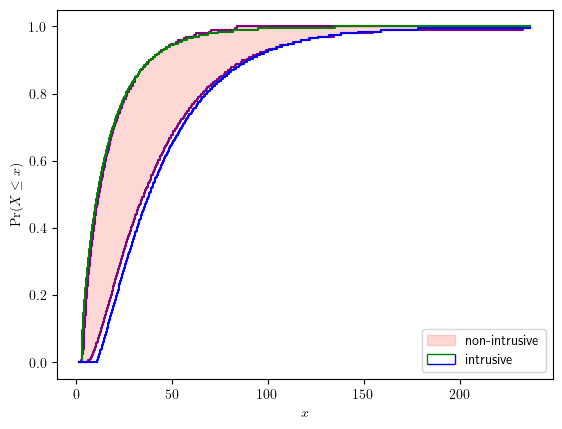

In [27]:
fig, ax = plt.subplots()
response2.plot(ax=ax, bound_colors=['purple', 'purple'], fill_color='salmon', label='non-intrusive')
response1.plot(ax=ax, style='simple', label='intrusive')
plt.show()

```{note}
**Perks of the `Uncertain Number` APIs**
Besides simplicity, the high-level APIs will also normally bring some additional capabilities. For example, the `pun.I()` constructor allows parsing capability for various types of inputs and will dynamically dispatch the right path. Notably, it supports deciphering the uncertainty indicated in everyday colloquialism such as "about 7" or "[7 +- 10%]". Further, this constructor can show the **significance** of the uncertainty indicated by the significant digits of a number.
```

In [3]:
pun.I(7.0)

UncertainNumber(essence='interval', intervals=[7.0,7.0], _construct=[7.0,7.0], nominal_value=7.0)

In [4]:
pun.I("about 7")

UncertainNumber(essence='interval', intervals=[5.0,9.0], _construct=[5.0,9.0], nominal_value=7.0)

In [7]:
pun.I("[7 +- 10%]")

UncertainNumber(essence='interval', intervals=[6.3,7.7], _construct=[6.3,7.7], nominal_value=7.0)

In [9]:
pun.I("7.0")

UncertainNumber(essence='interval', intervals=[6.95,7.05], _construct=[6.95,7.05], nominal_value=7.0)

In [10]:
pun.I("7.00")

UncertainNumber(essence='interval', intervals=[6.995,7.005], _construct=[6.995,7.005], nominal_value=7.0)

## Low-level `pba` APIs

On the other hand, **low-level APIs provide interfaces for deeper controls and customisation**, which enables advanced usage and extension, since low-level APIs expose additional controls. Often when facing with complicated modelling problems (say repeated variable problem, non-monotonicity，etc.), analysts will need to tweak the workflow to suit their needs and this is the way to go. In the above example of uncertainty characterisation and propagation, low-level functions call be called:

In [20]:
from pyuncertainnumber import pba
import pyuncertainnumber.propagation.mixed_uncertainty.mixed_up as mix

In [36]:
# construct a Pbox object
x0 = pba.normal([2,3], [1])  

In [37]:
# construct Interval objects
expert_a = pba.I(1,5)
expert_b = pba.I(3,6)
expert_c = pba.I(2,3)
expert_d = pba.I(2,9)

In [38]:
# aggregate intervals into a Dempster Shafer structure
x1 = pba.stacking([expert_a, expert_b, expert_c, expert_d])

In [46]:
response3 = mix.slicing(
    vars=[x0, x1], 
    func=foo, 
    interval_strategy='direct', 
    n_slices=100
) 

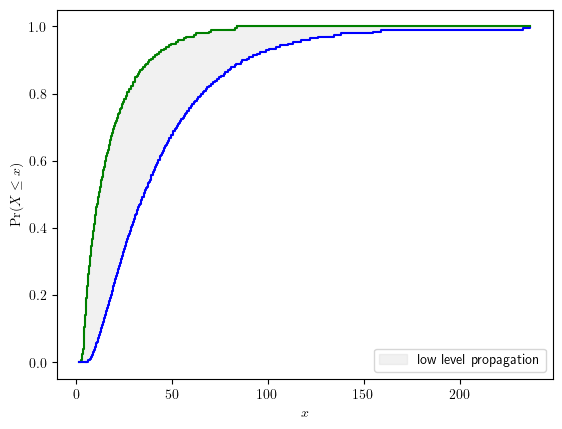

In [48]:
response3.display(label='low level propagation')